In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

In [3]:
data.shape

(5656458, 6)

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
indicators = data['IndicatorName'].unique().tolist()

In [6]:
indicators[:10]

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)']

## Selecting the Right Indicators 

**FIRST INDICATOR: 'Population, total'**
 to check the population of India over the past years

In [7]:
maskpop = data['IndicatorName'].str.contains('Population, total')

In [8]:
maskpop.any()

True

In [9]:
population_data = data[maskpop]

In [10]:
population_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08


In [11]:
indiamask = population_data['CountryName'].str.contains('India')

In [12]:
india_pop = population_data[indiamask]

**INDIA Population Data from 1960 - 2014**

In [13]:
india_pop.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11758,India,IND,"Population, total",SP.POP.TOTL,1960,449661874.0
36711,India,IND,"Population, total",SP.POP.TOTL,1961,458691457.0
64254,India,IND,"Population, total",SP.POP.TOTL,1962,468054145.0
92704,India,IND,"Population, total",SP.POP.TOTL,1963,477729958.0
121503,India,IND,"Population, total",SP.POP.TOTL,1964,487690114.0


In [14]:
india_pop.shape

(55, 6)

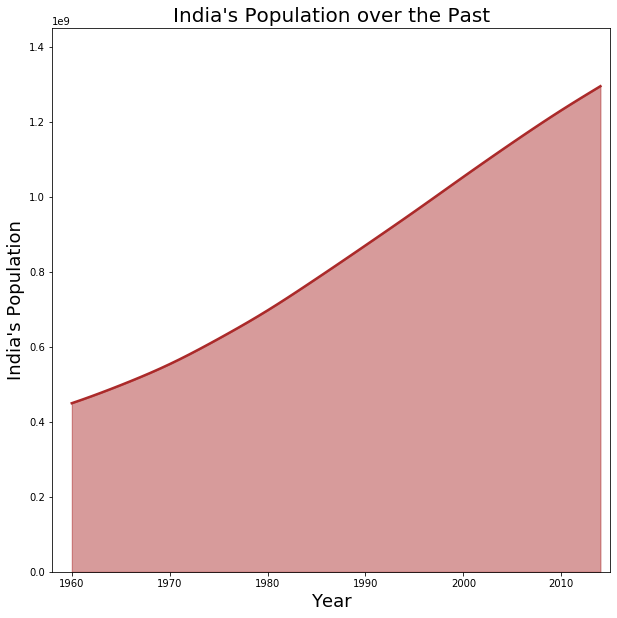

In [15]:
plt.figure(figsize= (10,10))
plt.plot(india_pop['Year'], india_pop['Value'], color = '#AB2A2A', linewidth = 2.5)
plt.fill_between(india_pop['Year'], india_pop['Value'], edgecolor = '#AB2A2A', facecolor = '#BB5454', alpha = 0.58)
plt.title('India\'s Population over the Past', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('India\'s Population', fontsize = 18)
plt.ylim(0,1.45e9)
plt.xlim(1958,2015)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=22)

#plt.savefig('population1.png', dpi = 500, transparent = True)

**SELECT INDICATOR: Exports of goods and services (current US$)**
to check how much India is exporting how the growth is. I choose this parameter as a basis to define how much industrialization is happening in the country

In [16]:
mask_exports = data['IndicatorName'].str.contains('Exports of goods and services \(current US')

In [17]:
mask_exports.any()

True

In [18]:
export_data = data[mask_exports]

In [19]:
export_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
92,Caribbean small states,CSS,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1960,8.725757e+08
257,East Asia & Pacific (all income levels),EAS,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1960,1.611636e+10
370,East Asia & Pacific (developing only),EAP,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1960,5.871789e+09
509,Euro area,EMU,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1960,4.229544e+10
615,Europe & Central Asia (all income levels),ECS,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1960,7.833431e+10


In [20]:
export_data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5638618,Vanuatu,VUT,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2014,3.909275e+08
5639353,Vietnam,VNM,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2014,1.608897e+11
5639918,West Bank and Gaza,WBG,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2014,2.292926e+09
5640675,Zambia,ZMB,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2014,1.107102e+10
5641235,Zimbabwe,ZWE,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2014,3.841893e+09


In [21]:
india_mask2 = export_data['CountryName'].str.contains('India')

In [22]:
india_exports = export_data[india_mask2]

**India's Export Data over the past year**

In [23]:
india_exports.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11594,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1960,1.652702e+09
36532,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1961,1.688402e+09
64068,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1962,1.757702e+09
92512,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1963,2.072702e+09
121309,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1964,2.104202e+09


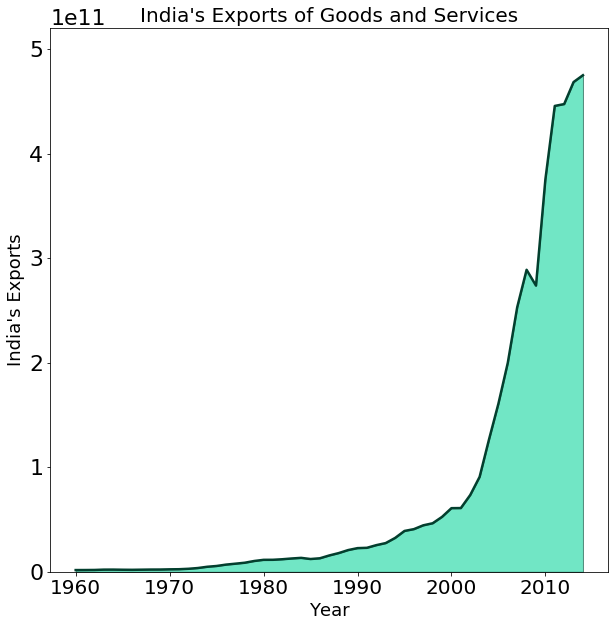

In [24]:
plt.figure(figsize= (10,10))
plt.plot(india_exports['Year'], india_exports['Value'], color = '#033F2E', linewidth = 2.5)
plt.fill_between(india_exports['Year'], india_exports['Value'], edgecolor = '#033F2E', facecolor = '#0BD49B', alpha = 0.58)
plt.title('India\'s Exports of Goods and Services', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('India\'s Exports', fontsize = 18)
plt.ylim(0, 5.2e11)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=22)
#plt.savefig('exports.png', dpi = 500, transparent = True)

**THIRD PARAMETER: Electric power consumption (kWh per capita)** to check how with the increasing population and increasing exports, how it effects the energy consumption or how much the increase in exports increase the load on natural resources

In [25]:
mask_powerconsumption = data['IndicatorName'].str.contains('Electric power consumption \(kWh per capita')

In [26]:
mask_powerconsumption.any()

True

In [27]:
powerconsumption_data = data[mask_powerconsumption]

In [28]:
powerconsumption_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
495,Euro area,EMU,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1960,1214.933660
813,European Union,EUU,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1960,1427.783281
1105,High income,HIC,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1960,2272.976207
1305,High income: OECD,OEC,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1960,2272.976207
2438,North America,NAC,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1960,4192.355536


In [29]:
indiamask3 = powerconsumption_data['CountryName'].str.contains('India')

In [30]:
indiamask3.any()

True

In [31]:
indiapower_consp = powerconsumption_data[indiamask3] 

In [32]:
indiapower_consp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
394192,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1971,97.990594
463190,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1972,100.527659
532890,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1973,100.855690
602780,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1974,104.224813
674020,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1975,114.816764


(1970, 2013)

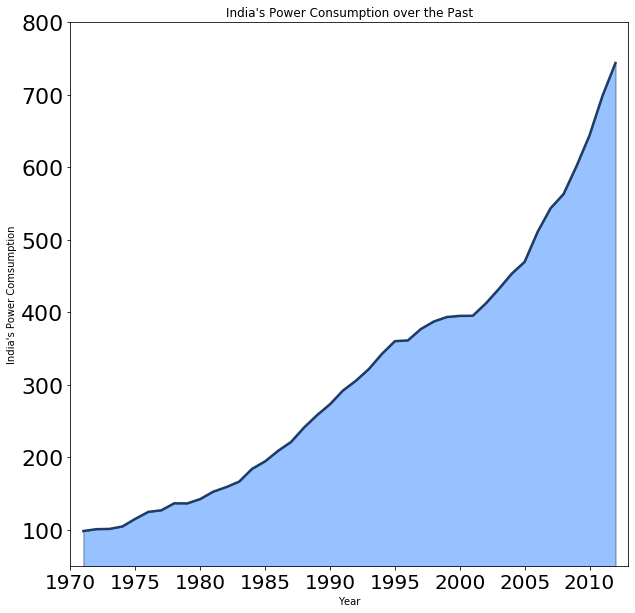

In [33]:
plt.figure(figsize= (10,10))
plt.plot(indiapower_consp['Year'], indiapower_consp['Value'], color = '#1E3C66', linewidth = 2.5)
plt.fill_between(indiapower_consp['Year'], indiapower_consp['Value'], edgecolor = '#1E3C66', facecolor = '#4C97FF', alpha = 0.58)
plt.title('India\'s Power Consumption over the Past')
plt.xlabel('Year')
plt.ylabel('India\'s Power Comsumption')
plt.ylim(50, 800)
plt.xlim(1970, 2013)
#plt.savefig('powerconsumption.png', dpi = 1000, transparent = True)

**FOURTH PARAMTER: CO2 emissions (metric tons per capita)** to check how this increase in power consumption and and population growth have resulted in increase in Co-2 emissions

In [34]:
co2_mask = data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita')

In [35]:
co2_mask.any()

True

In [36]:
co2emissions_data = data[co2_mask]

In [37]:
indiamask4 = co2emissions_data['CountryName'].str.contains('India')

In [38]:
india_co2emission = co2emissions_data[indiamask4]

In [39]:
india_co2emission.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


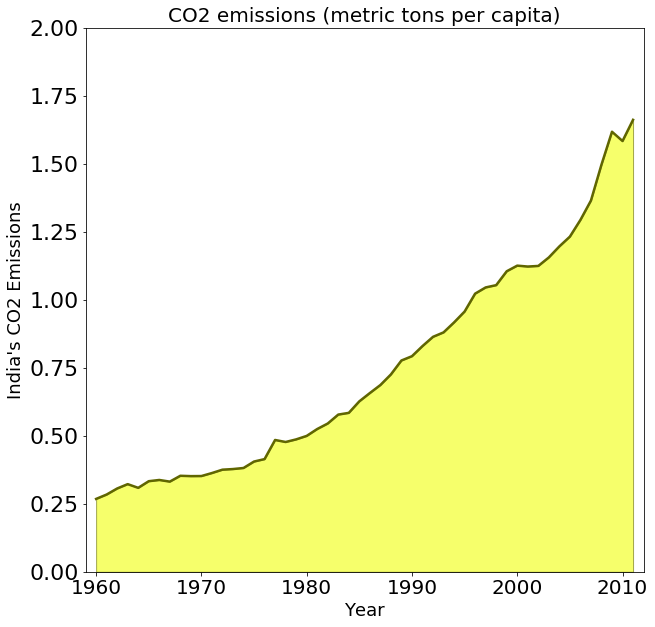

In [40]:
plt.figure(figsize= (10,10))
plt.plot(india_co2emission['Year'], india_co2emission['Value'], color = '#606600', linewidth = 2.5)
plt.fill_between(india_co2emission['Year'], india_co2emission['Value'], edgecolor = '#606600', facecolor = '#F0FF00', alpha = 0.58)
plt.title('CO2 emissions (metric tons per capita)', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('India\'s CO2 Emissions', fontsize = 18)
plt.ylim(0, 2)
plt.xlim(1959, 2012)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=22)
#plt.savefig('population.png', dpi = 500, transparent = True)


In [41]:
ruralpercentage = data['IndicatorName'].str.contains('Rural population \(% of total population')

In [42]:
rural_data = data[ruralpercentage]

In [43]:
indiamask5 = rural_data['CountryName'].str.contains('India')

In [44]:
india_rural = rural_data[indiamask5]

In [45]:
india_rural.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11760,India,IND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,82.076
36713,India,IND,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,81.968
64258,India,IND,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,81.782
92706,India,IND,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,81.595
121505,India,IND,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,81.405


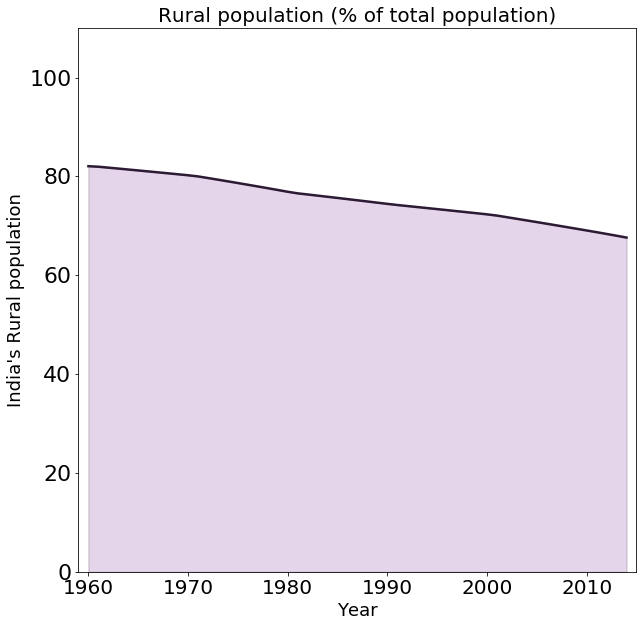

In [46]:
plt.figure(figsize= (10,10))
plt.plot(india_rural['Year'], india_rural['Value'], color = '#2D1A35', linewidth = 2.5)
plt.fill_between(india_rural['Year'], india_rural['Value'], edgecolor = '#2D1A35', facecolor = '#9658B2', alpha = 0.25)
plt.ylim(0,110)
plt.xlim(1959, 2015)
plt.title('Rural population (% of total population)', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('India\'s Rural population', fontsize = 18)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=22)
#plt.savefig('ruralpopulation.png', dpi = 500, transparent = True)

**Finding,  What are sources of electricity Production**

In [47]:
mask_nonrenewable = data['IndicatorName'].str.contains('Electricity production from oil, gas and coal sources \(% of total') 

In [48]:
mask_nonrenewable.any()

True

In [49]:
nonrenewable_data = data[mask_nonrenewable]

In [50]:
nonrenewable_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
502,Euro area,EMU,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1960,55.057684
820,European Union,EUU,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1960,59.330142
1112,High income,HIC,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1960,55.332661
1312,High income: OECD,OEC,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1960,64.705518
2445,North America,NAC,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1960,72.128396


In [51]:
maskIndia9 = nonrenewable_data['CountryName'].str.contains('India')

In [52]:
maskIndia9.any()

True

In [53]:
india_nonrenewable = nonrenewable_data[maskIndia9]

In [54]:
india_nonrenewable.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
394199,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1971,55.983369
463197,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1972,59.816212
532897,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1973,56.900104
602787,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1974,60.760583
674027,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1975,58.176803


In [55]:
mask_renewable = data['IndicatorName'].str.contains('Electricity production from renewable sources, excluding hydroelectric \(% of total')

In [56]:
renewable_data = data[mask_renewable]

In [57]:
renewable_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
503,Euro area,EMU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.615391
821,European Union,EUU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.352812
1113,High income,HIC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.150760
1313,High income: OECD,OEC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.176297
2446,North America,NAC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.013318


In [58]:
indiamask8 = renewable_data['CountryName'].str.contains('India')

In [59]:
indiamask8.any()

True

In [60]:
india_renewable = renewable_data[indiamask8]

In [61]:
india_renewable.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
394200,India,IND,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1971,0.0
463198,India,IND,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1972,0.0
532898,India,IND,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1973,0.0
602788,India,IND,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1974,0.0
674028,India,IND,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1975,0.0


In [62]:
mask_hydro = data['IndicatorName'].str.contains('Electricity production from hydroelectric sources \(% of total')

In [63]:
hydro_data = data[mask_hydro]

In [64]:
indiamask0 = hydro_data['CountryName'].str.contains('India')

In [65]:
india_hydro = hydro_data[indiamask0]

In [66]:
india_hydro.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
394195,India,IND,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1971,42.224030
463193,India,IND,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1972,38.577061
532893,India,IND,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1973,39.808506
602783,India,IND,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1974,36.362451
674023,India,IND,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1975,38.767079


In [67]:
india_hydro.shape

(42, 6)

**Setting the Year as Index**

In [68]:
india_nonrenewable= india_nonrenewable.set_index('Year')

In [69]:
india_hydro = india_hydro.set_index('Year')

In [70]:
india_renewable = india_renewable.set_index('Year')

In [71]:
india_nonrenewable.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1971,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,55.983369
1972,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,59.816212
1973,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,56.900104
1974,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,60.760583
1975,India,IND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,58.176803


In [72]:
y = np.vstack([india_nonrenewable['Value'], india_renewable['Value'], india_hydro['Value']])

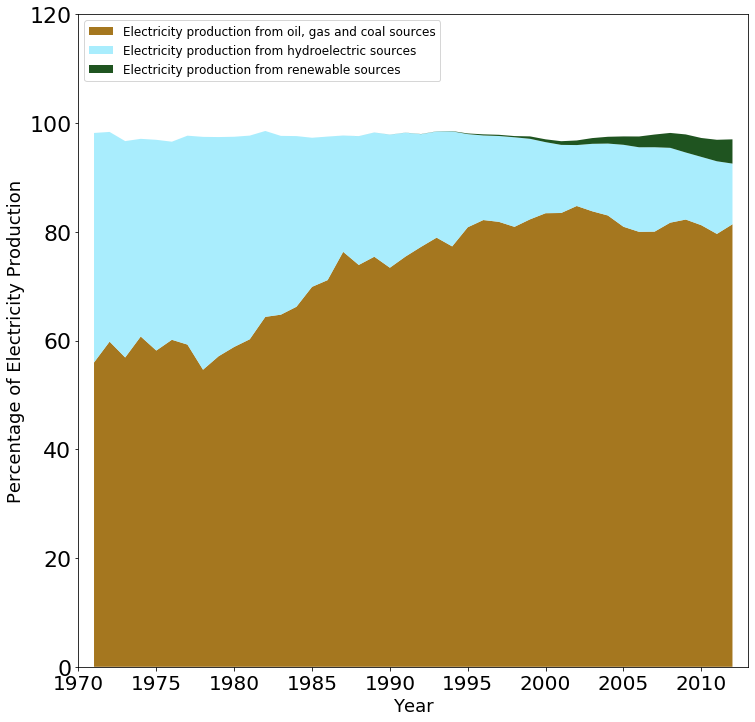

In [73]:
legends = ['Electricity production from oil, gas and coal sources', 'Electricity production from hydroelectric sources', 'Electricity production from renewable sources']
#col_pallete = list('#6CE5C3', '#9DEBFD', '#996400')
plt.figure(figsize = (12,12))
plt.stackplot(india_nonrenewable.index,  india_nonrenewable['Value'],india_hydro['Value'],india_renewable['Value'], labels = legends,  colors = ['#996400','#9DEBFD','#003C01'], alpha = 0.88)
plt.ylim(0, 120)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Percentage of Electricity Production', fontsize = 18)
plt.xlim(1970, 2013)
plt.legend(loc='upper left', fontsize = 12)

plt.savefig('Electric distribution.png', dpi = 650, transparent = True)

## Creating other dataframe to incorporate all these data to find the correlation between them

**Setting 'Year' as Index**

In [74]:
india_co2emission = india_co2emission.set_index('Year')

In [75]:
india_exports = india_exports.set_index('Year')

In [76]:
india_pop = india_pop.set_index('Year')

In [77]:
indiapower_consp = indiapower_consp.set_index('Year')

In [78]:
india_co2emission.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.268161
1961,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.284292
1962,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.306519
1963,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.322533
1964,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.308900


In [79]:
india_pop.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,India,IND,"Population, total",SP.POP.TOTL,449661874.0
1961,India,IND,"Population, total",SP.POP.TOTL,458691457.0
1962,India,IND,"Population, total",SP.POP.TOTL,468054145.0
1963,India,IND,"Population, total",SP.POP.TOTL,477729958.0
1964,India,IND,"Population, total",SP.POP.TOTL,487690114.0


In [80]:
india_exports.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1.652702e+09
1961,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1.688402e+09
1962,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1.757702e+09
1963,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2.072702e+09
1964,India,IND,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2.104202e+09


In [81]:
indiapower_consp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1971,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,97.990594
1972,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,100.527659
1973,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,100.855690
1974,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,104.224813
1975,India,IND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,114.816764


In [82]:
merge_dict = {'Population': india_pop['Value'],'Exports': india_exports['Value'],  'Power Consumption': indiapower_consp['Value'],  'CO2 Emission': india_co2emission['Value']}

In [83]:
subset_data = pd.DataFrame(merge_dict)

In [84]:
subset_data.head()

,Population,Exports,Power Consumption,CO2 Emission
Year,,,,
1960,449661874.0,1.652702e+09,NaN,0.268161
1961,458691457.0,1.688402e+09,NaN,0.284292
1962,468054145.0,1.757702e+09,NaN,0.306519
1963,477729958.0,2.072702e+09,NaN,0.322533
1964,487690114.0,2.104202e+09,NaN,0.308900


In [85]:
year_list = [i for i in range(1960,1971)]

In [86]:
year_list

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970]

In [87]:
subset_data = subset_data.drop(year_list)

In [88]:
subset_data.head()

,Population,Exports,Power Consumption,CO2 Emission
Year,,,,
1971,566605402.0,2.469904e+09,97.990594,0.363338
1972,579800632.0,2.878179e+09,100.527659,0.375731
1973,593451889.0,3.599135e+09,100.855690,0.378031
1974,607446519.0,4.808426e+09,104.224813,0.381915
1975,621703641.0,5.560809e+09,114.816764,0.405662


In [89]:
subset_data = subset_data.drop(2013)

In [90]:
subset_data = subset_data.drop(2014)

In [91]:
subset_data = subset_data.drop(2012)

In [92]:
subset_data.head()

,Population,Exports,Power Consumption,CO2 Emission
Year,,,,
1971,566605402.0,2.469904e+09,97.990594,0.363338
1972,579800632.0,2.878179e+09,100.527659,0.375731
1973,593451889.0,3.599135e+09,100.855690,0.378031
1974,607446519.0,4.808426e+09,104.224813,0.381915
1975,621703641.0,5.560809e+09,114.816764,0.405662


In [93]:
corr_subsetdata = subset_data.corr()


In [94]:
type(corr_subsetdata)

pandas.core.frame.DataFrame

In [95]:
corr_subsetdata

,Population,Exports,Power Consumption,CO2 Emission
Population,1.000000,0.777575,0.980156,0.986383
Exports,0.777575,1.000000,0.872297,0.849877
Power Consumption,0.980156,0.872297,1.000000,0.996209
CO2 Emission,0.986383,0.849877,0.996209,1.000000
